In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline
from sklearn.model_selection import train_test_split
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [83]:
class Linear_Regression():

    #inititating the parameters (learning rate and the number of iterations)
    def __init__(self, learning_rate, no_of_iterations):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations

    def fit(self, X, Y):

        #no of training examples and number of features
        self.rows, self.features = X.shape  #number of rows and columns 
        
        #Inititating the weights and bias
        self.w = np.zeros(self.features)
        self.b = 0
        self.X = X
        self.Y = Y

        #implementing Gradient Descent
        for i in range(self.no_of_iterations):
            self.update_weights()

    def update_weights(self):
        Y_prediction = self.predict(self.X)

        #calculate gradients
        dw = -2*(2*(self.X.T).dot(self.Y - Y_prediction))/self.rows
        db = -2*(np.sum(self.Y - Y_prediction))/self.rows

        #updating the weights
        self.w = self.w - self.learning_rate*dw
        self.b = self.b - self.learning_rate*db

    
    def predict(self, X):
        return X.dot(self.w) + self.b

Using linear regression model for prediction

In [84]:
#Data Preprocessing 

#loading the data 
salary_data = pd.read_csv('Data sets/salary_data.csv')

In [85]:
#taking a look at the head of the dataframe
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [86]:
# number of rows and columns 
salary_data.shape

(30, 2)

In [87]:
#checking for missing values
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [88]:
#splitting the features and target
X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,-1].values

In [89]:
#Splitting the dataset into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.2, random_state = 44)

In [90]:
#Training the Linear Regression model
model = Linear_Regression(learning_rate = 0.01, no_of_iterations = 500)


In [91]:
model.fit(X_train, Y_train)

In [93]:
# printing the parameter values ( weights & bias)

print('weight = ', model.w)
print('bias = ', model.b)

weight =  [9517.29295711]
bias =  24850.72495576986


In [100]:
test_data_prediction = model.predict(X_test)
print(test_data_prediction)

[102892.52720405  92423.50495123  39126.66439143 107651.1736826
  73388.91903702  62919.8967842 ]


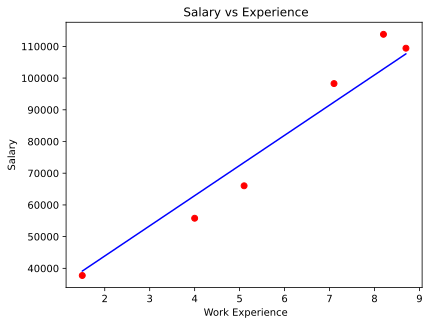

In [99]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, test_data_prediction, color='blue')
plt.xlabel(' Work Experience')
plt.ylabel('Salary')
plt.title(' Salary vs Experience')
plt.show()